# TP1 DEEP LEARNING
Realised by : 
- Noureddine Ben Nejma
- Mehdi Cherif
- Med Ali Selmi
- Walid Sboui

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

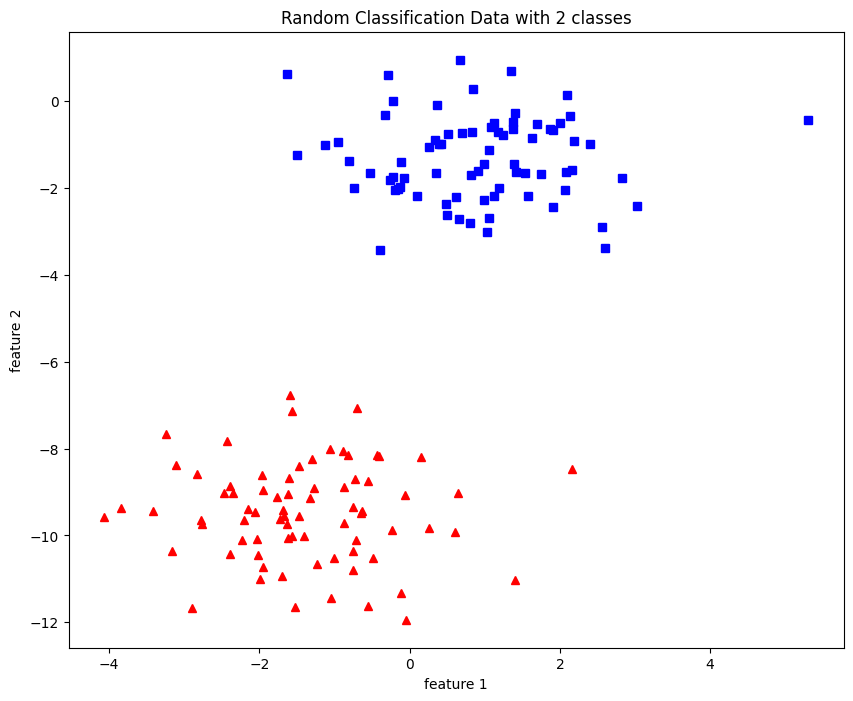

In [2]:
X, y = datasets.make_blobs (n_samples=150, n_features=2,centers=2, cluster_std=1.05, random_state=2)

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [3]:
def acti_func(x):
    return(x>0).astype(int)

In [4]:
def perceptron(X, y, lr, epochs):
    m, n = X.shape
    w = np.zeros((n+1,1))
    n_miss_list = []
    for epoch in range(epochs):
        n_miss = 0
        for id_x, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1).reshape(-1, 1)
            y_hat = acti_func(np.dot(x_i.T, w))
            if(np.squeeze(y_hat) != y[id_x]):
                w += lr*(y[id_x] - y_hat)*x_i
                n_miss += 1
        n_miss_list.append(n_miss)
    return w, n_miss_list


In [5]:
def plot_decision_boundary(X, w):
    x1 = [min(X[:, 0]), max(X[:, 0])]
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1 + c
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
    plt.plot(x1, x2, 'g-')
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Random Classification Data with 2 classes')

[[1.        ]
 [0.14885954]
 [0.16938433]]


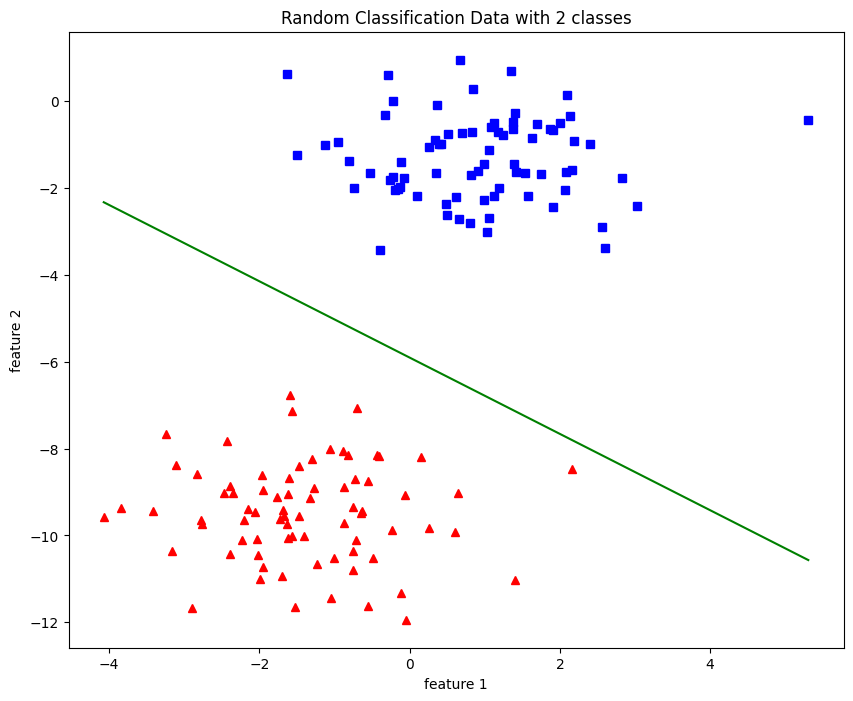

In [6]:
w, n_miss_list = perceptron(X, y, 0.1, 100)
print(w)
plot_decision_boundary(X, w) 

In [7]:
def generate_data(sigma) : 
    mu1 = np.array([-1, 0])
    mu2 = np.array([1, 0])
    sigma1_2 = sigma
    sigma2_2 = sigma

    # Générer les points
    X1 = np.random.normal(mu1, sigma1_2, (125, 2))
    X2 = np.random.normal(mu2, sigma2_2, (125, 2))

    # Définir les labels
    y1 = np.full(125, 0, dtype=int)
    y2 = np.full(125, 1, dtype=int)

    # Mélanger les données
    X = np.concatenate((X1, X2), axis=0)
    y = np.concatenate((y1, y2), axis=0)

    # Définir les ensembles d'apprentissage et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = generate_data(0.25)
w, n_miss_list = perceptron(X_train, y_train, 0.1, 100)
print(w)
print(n_miss_list)

[[ 0.        ]
 [ 0.15670792]
 [-0.0886937 ]]
[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [9]:
def plot_part2(X, y, w):
    x1 = [min(X[:, 0]), max(X[:, 0])]
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1 + c
    fig = plt.figure(figsize=(8,6))
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'r^')
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bs')
    plt.plot(x1, x2, 'g-')
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.xlim([min(X[:, 0]), max(X[:, 0])])
    plt.ylim([min(X[:, 0]), max(X[:, 0])])
    plt.title('Random Classification Data with 2 classes')


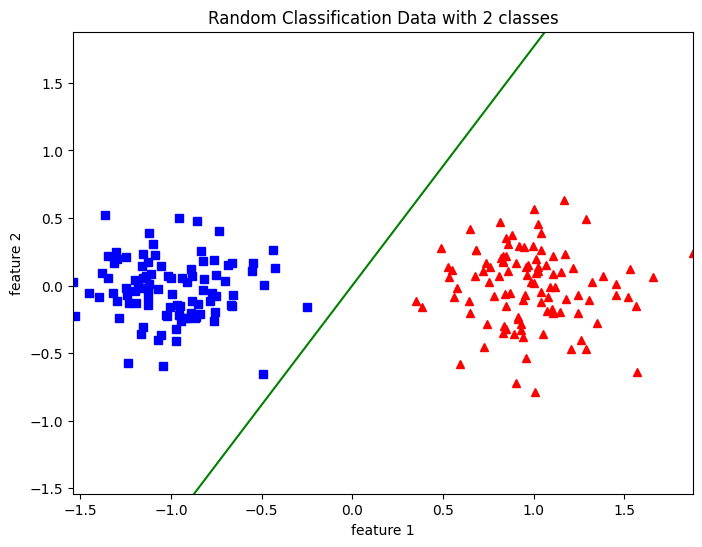

In [10]:
plot_part2(X_train, y_train, w)

[[-0.1       ]
 [ 0.27264196]
 [ 0.07554449]]


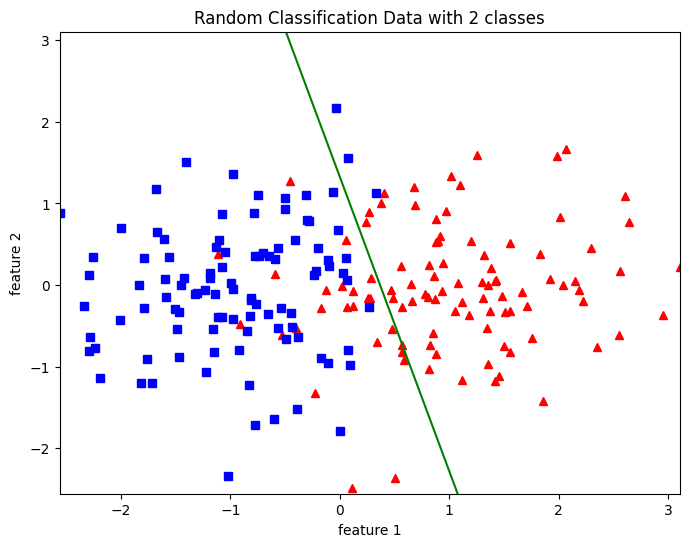

In [11]:
X_train, X_test, y_train, y_test = generate_data(0.75)
w, n_miss_list = perceptron(X_train, y_train, 0.1, 500)
print(w)
plot_part2(X_train, y_train, w)

In [26]:
sigmas = [0.01, 0.1, 0.5, 0.7]
nb_experience = 30

In [17]:
def predict(X, w):
    return acti_func(np.dot(np.insert(X, 0, 1, axis=1), w))


In [28]:
def compute_eror(sigmas, nb_experience):
    mean_errors = []
    var_errors = []
    for sigma in sigmas:
        errors_in_exp = []
        for _ in range(nb_experience):
            X_train, X_test, y_train, y_test = generate_data(sigma)
            w, _ = perceptron(X_train, y_train, 0.1, 100)
            y_pred = np.squeeze(predict(X_test, w))
            errors_in_exp.append(np.sum(y_pred != y_test)/len(y_test))
        mean_error = np.mean(errors_in_exp)
        var_error = np.var(errors_in_exp, ddof=1)
        mean_errors.append(mean_error)
        var_errors.append(var_error)
    return mean_errors, var_errors


In [29]:
me, ve = compute_eror(sigmas, nb_experience)

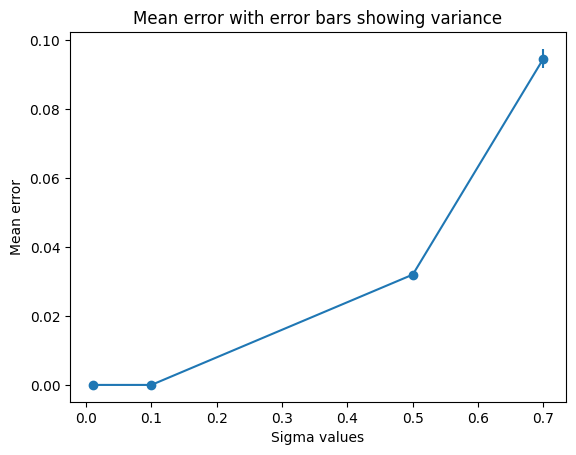

In [30]:
plt.errorbar(sigmas, me, yerr=ve, fmt='-o')
plt.xlabel('Sigma values')
plt.ylabel('Mean error')
plt.title('Mean error with error bars showing variance')
plt.show()